In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
from matplotlib import cm
from astropy.io import fits, ascii
from scipy import interpolate
import os

import read_mist_models
from isochrones.dartmouth import DartmouthModelGrid
from isochrones.mist import MISTModelGrid

In [2]:
test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/test_results/safe_sample_final.csv.gz')

In [3]:
test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/safe_results.csv')

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


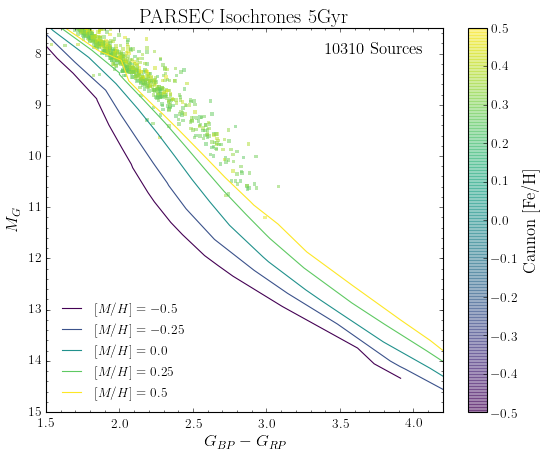

In [19]:
age = '5Gyr'
met = np.linspace(-.5,.5,5)
pars_dir = 'isochrones/parsec/evans_passbands/%s/'%(age)

flist = ['%sMH_%s.dat'%(m, age) for m in met]
pars = [ascii.read(pars_dir + file) for file in flist]

rng = [0,30]
colors = [cm.viridis(x) for x in np.linspace(0,1,len(pars))]

# pl = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['FE_H'], cmap='viridis', edgecolor='none', s=10, marker='s', \
#                 label=None, alpha=.5)

ss = test[test['FE_H'] > .25][test['FE_H'] < 5]
pl = plt.scatter(ss['BP_RP'], ss['G_ABS'], c=ss['FE_H'], cmap='viridis', edgecolor='none', s=10, marker='s', \
                label=None, alpha=.5)

for i in range(len(pars)):
    plt.plot(pars[i]['G_BPmag'][rng[0]:rng[1]] - pars[i]['G_RPmag'][rng[0]:rng[1]], pars[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label=r'$[M/H]=%s$'%(met[i]))
    
plt.text(3.4, 8, '%s Sources'%(len(test)), fontsize=15)
plt.colorbar(pl, orientation='vertical').set_label(r'Cannon [Fe/H]', fontsize=15)
plt.clim(-.5,.5)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.title('PARSEC Isochrones ' + age, fontsize=18)
plt.legend(loc='lower left', scatterpoints=1, frameon=False, fontsize=12)
plt.minorticks_on()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


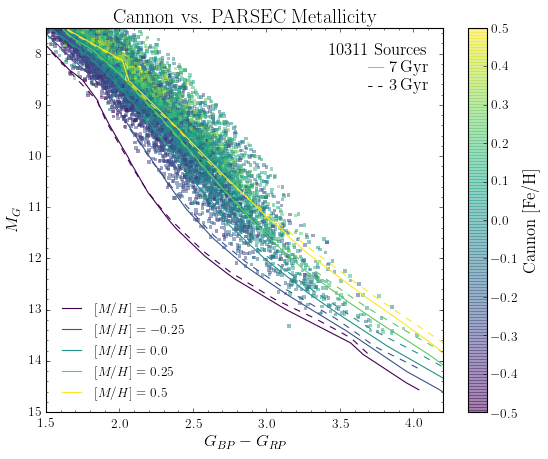

In [51]:
age1 = '3Gyr'
met1 = np.linspace(-.5,.5,5)
pars_dir1 = 'isochrones/parsec/evans_passbands/%s/'%(age1)

flist1 = ['%sMH_%s.dat'%(m, age1) for m in met1]
pars1 = [ascii.read(pars_dir1 + file) for file in flist1]

# ======
age2 = '7Gyr'
met2 = np.linspace(-.5,.5,5)
pars_dir2 = 'isochrones/parsec/evans_passbands/%s/'%(age2)

flist2 = ['%sMH_%s.dat'%(m, age2) for m in met2]
pars2 = [ascii.read(pars_dir2 + file) for file in flist2]

# ======
rng = [0,30]
colors = [cm.viridis(x) for x in np.linspace(0,1,len(pars1))]

pl = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['FE_H'], cmap='viridis', edgecolor='none', s=10, marker='s', \
                label=None, alpha=.5)

for i in range(len(pars)):
    plt.plot(pars1[i]['G_BPmag'][rng[0]:rng[1]] - pars1[i]['G_RPmag'][rng[0]:rng[1]], pars1[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label='_nolegend_', linestyle='--')
    plt.plot(pars2[i]['G_BPmag'][rng[0]:rng[1]] - pars2[i]['G_RPmag'][rng[0]:rng[1]], pars2[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label=r'$[M/H]=%s$'%(met1[i]))
    
plt.text(4.1, 7.8, '%s Sources\n --- %s\,Gyr\n - - %s\,Gyr'%(len(test)+1, age2[0], age1[0]), fontsize=15, ha='right', va='top')
plt.colorbar(pl, orientation='vertical').set_label(r'Cannon [Fe/H]', fontsize=15)
plt.clim(-.5,.5)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.title('Cannon vs. PARSEC Metallicity', fontsize=18)
plt.legend(loc='lower left', scatterpoints=1, frameon=False, fontsize=12)
plt.minorticks_on()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


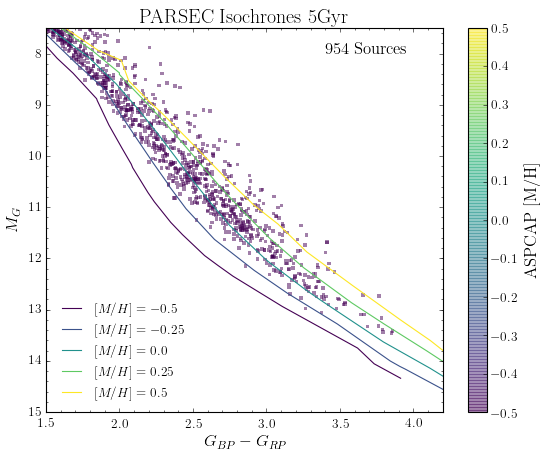

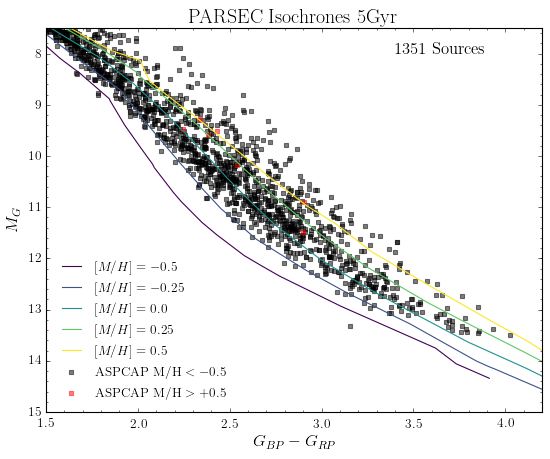

In [23]:
age = '5Gyr'
met = np.linspace(-.5,.5,5)
pars_dir = 'isochrones/parsec/evans_passbands/%s/'%(age)

flist = ['%sMH_%s.dat'%(m, age) for m in met]
pars = [ascii.read(pars_dir + file) for file in flist]

rng = [0,30]
colors = [cm.viridis(x) for x in np.linspace(0,1,len(pars))]


sel1 = test[test['M_H_APOGEE'] > -.75][test['M_H_APOGEE'] < -.5]
pl = plt.scatter(sel1['BP_RP'], sel1['G_ABS'], c=sel1['M_H_APOGEE'], cmap='viridis', edgecolor='none', s=10, marker='s', \
                label=None, alpha=.5)

for i in range(len(pars)):
    plt.plot(pars[i]['G_BPmag'][rng[0]:rng[1]] - pars[i]['G_RPmag'][rng[0]:rng[1]], pars[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label=r'$[M/H]=%s$'%(met[i]))
    
plt.text(3.4, 8, '%s Sources'%(len(sel1)), fontsize=15)
plt.colorbar(pl, orientation='vertical').set_label(r'ASPCAP [M/H]', fontsize=15)
plt.clim(-.5,.5)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.title('PARSEC Isochrones ' + age, fontsize=18)
plt.legend(loc='lower left', scatterpoints=1, frameon=False, fontsize=12)
plt.minorticks_on()
plt.show()

#=====
sel2 = test[test['M_H_APOGEE'] < -.5]
sel3 = test[test['M_H_APOGEE'] > .5]
plt.scatter(sel2['BP_RP'], sel2['G_ABS'], color='k', s=10, marker='s', label=r'ASPCAP M/H $< -0.5$', alpha=.5)
plt.scatter(sel3['BP_RP'], sel3['G_ABS'], color='r', s=10, marker='s', label=r'ASPCAP M/H $> +0.5$', alpha=.5)

for i in range(len(pars)):
    plt.plot(pars[i]['G_BPmag'][rng[0]:rng[1]] - pars[i]['G_RPmag'][rng[0]:rng[1]], pars[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label=r'$[M/H]=%s$'%(met[i]))
    
plt.text(3.4, 8, '%s Sources'%(len(sel2)+len(sel3)), fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.title('PARSEC Isochrones ' + age, fontsize=18)
plt.legend(loc='lower left', scatterpoints=1, frameon=False, fontsize=12)
plt.minorticks_on()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


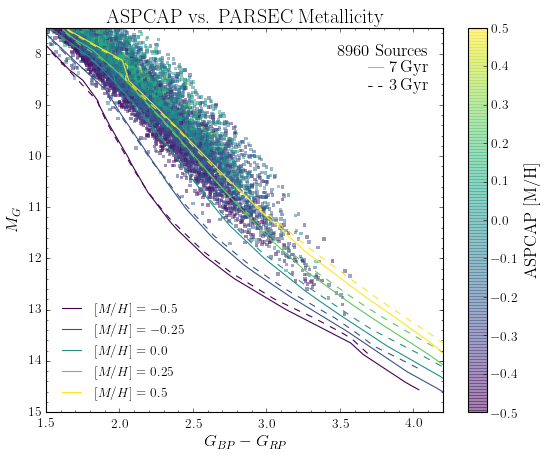

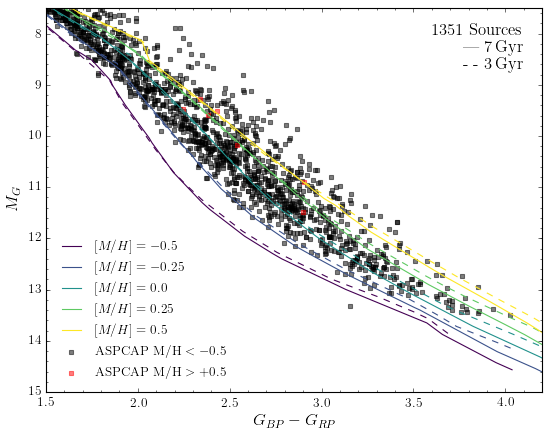

In [50]:
age1 = '3Gyr'
met1 = np.linspace(-.5,.5,5)
pars_dir1 = 'isochrones/parsec/evans_passbands/%s/'%(age1)

flist1 = ['%sMH_%s.dat'%(m, age1) for m in met1]
pars1 = [ascii.read(pars_dir1 + file) for file in flist1]

# ======
age2 = '7Gyr'
met2 = np.linspace(-.5,.5,5)
pars_dir2 = 'isochrones/parsec/evans_passbands/%s/'%(age2)

flist2 = ['%sMH_%s.dat'%(m, age2) for m in met2]
pars2 = [ascii.read(pars_dir2 + file) for file in flist2]

# ======
rng = [0,30]
colors = [cm.viridis(x) for x in np.linspace(0,1,len(pars1))]


sel1 = test[test['M_H_APOGEE'] > -.5][test['M_H_APOGEE'] < .5]
pl = plt.scatter(sel1['BP_RP'], sel1['G_ABS'], c=sel1['M_H_APOGEE'], cmap='viridis', edgecolor='none', s=10, marker='s', \
                label=None, alpha=.5)

for i in range(len(pars)):
    plt.plot(pars1[i]['G_BPmag'][rng[0]:rng[1]] - pars1[i]['G_RPmag'][rng[0]:rng[1]], pars1[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label='_nolegend_', linestyle='--')
    plt.plot(pars2[i]['G_BPmag'][rng[0]:rng[1]] - pars2[i]['G_RPmag'][rng[0]:rng[1]], pars2[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label=r'$[M/H]=%s$'%(met2[i]))
    
plt.text(4.1, 7.8, '%s Sources\n --- %s\,Gyr\n - - %s\,Gyr'%(len(sel1)+1, age2[0], age1[0]), fontsize=15, ha='right', va='top')
plt.colorbar(pl, orientation='vertical').set_label(r'ASPCAP [M/H]', fontsize=15)
plt.clim(-.5,.5)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.title('ASPCAP vs. PARSEC Metallicity', fontsize=18)
plt.legend(loc='lower left', scatterpoints=1, frameon=False, fontsize=12)
plt.minorticks_on()
plt.show()

#=====
sel2 = test[test['M_H_APOGEE'] < -.5]
sel3 = test[test['M_H_APOGEE'] > .5]
plt.scatter(sel2['BP_RP'], sel2['G_ABS'], color='k', s=10, marker='s', label=r'ASPCAP M/H $< -0.5$', alpha=.5)
plt.scatter(sel3['BP_RP'], sel3['G_ABS'], color='r', s=10, marker='s', label=r'ASPCAP M/H $> +0.5$', alpha=.5)

for i in range(len(pars)):
    plt.plot(pars1[i]['G_BPmag'][rng[0]:rng[1]] - pars1[i]['G_RPmag'][rng[0]:rng[1]], pars1[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label='_nolegend_', linestyle='--')
    plt.plot(pars2[i]['G_BPmag'][rng[0]:rng[1]] - pars2[i]['G_RPmag'][rng[0]:rng[1]], pars2[i]['Gmag'][rng[0]:rng[1]], \
            color=colors[i], label=r'$[M/H]=%s$'%(met2[i]))
    
plt.text(4.1, 7.8, '%s Sources\n --- %s\,Gyr\n - - %s\,Gyr'%(len(sel2)+len(sel3), age2[0], age1[0]), \
         fontsize=15, ha='right', va='top')
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
# plt.title('PARSEC Isochrones', fontsize=18)
plt.legend(loc='lower left', scatterpoints=1, frameon=False, fontsize=12)
plt.minorticks_on()
plt.show()

In [22]:
pars

[<Table length=395>
   Zini      Age         Mini       Mass  ... mbolmag   Gmag  G_BPmag G_RPmag
 float64   float64     float64    float64 ... float64 float64 float64 float64
 ------- ----------- ------------ ------- ... ------- ------- ------- -------
  0.0048 500000000.0 0.0900000036    0.09 ...  12.758  14.341  16.937  13.024
  0.0048 500000000.0 0.0954919755   0.096 ...  12.574  14.059  16.493   12.76
  0.0048 500000000.0 0.1000000089     0.1 ...  12.395  13.751  16.091  12.471
  0.0048 500000000.0 0.1200000048    0.12 ...   11.83  12.939  14.838   11.73
  0.0048 500000000.0 0.1400000006    0.14 ...  11.376  12.347  13.965  11.193
  0.0048 500000000.0 0.1504555345    0.15 ...  11.215  12.138  13.674  11.004
  0.0048 500000000.0 0.1599999964    0.16 ...  11.065  11.945  13.408  10.829
  0.0048 500000000.0 0.1843287498   0.184 ...  10.735  11.537  12.884  10.455
  0.0048 500000000.0 0.1999999881     0.2 ...  10.539  11.297  12.584  10.235
  0.0048 500000000.0 0.2334237546   0.233 ..

In [50]:
met = np.linspace(-.5,.5,5)
x = np.array([np.array(p['G_BPmag'][rng[0]:rng[1]])-np.array(p['G_RPmag'][rng[0]:rng[1]]) for p in pars])
y = np.array([np.array(p['Gmag'][rng[0]:rng[1]]) for p in pars])
z = np.array([np.array([m for i in range(len(x[0]))]) for m in met])

In [51]:
rbf = interpolate.Rbf(x, y, z, function='linear')

In [62]:
xi, yi = np.linspace(x.min(), x.max(), 500), np.linspace(y.min(), y.max(), 500)
xi, yi = np.meshgrid(xi, yi)

In [63]:
rbf = interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


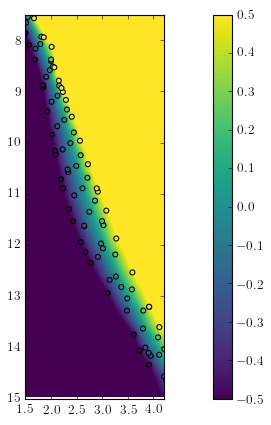

In [70]:
plt.figure(figsize=[16,6])
pl = plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower', \
           extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
plt.scatter(x, y, c=z, cmap='viridis')
plt.colorbar(pl)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] n

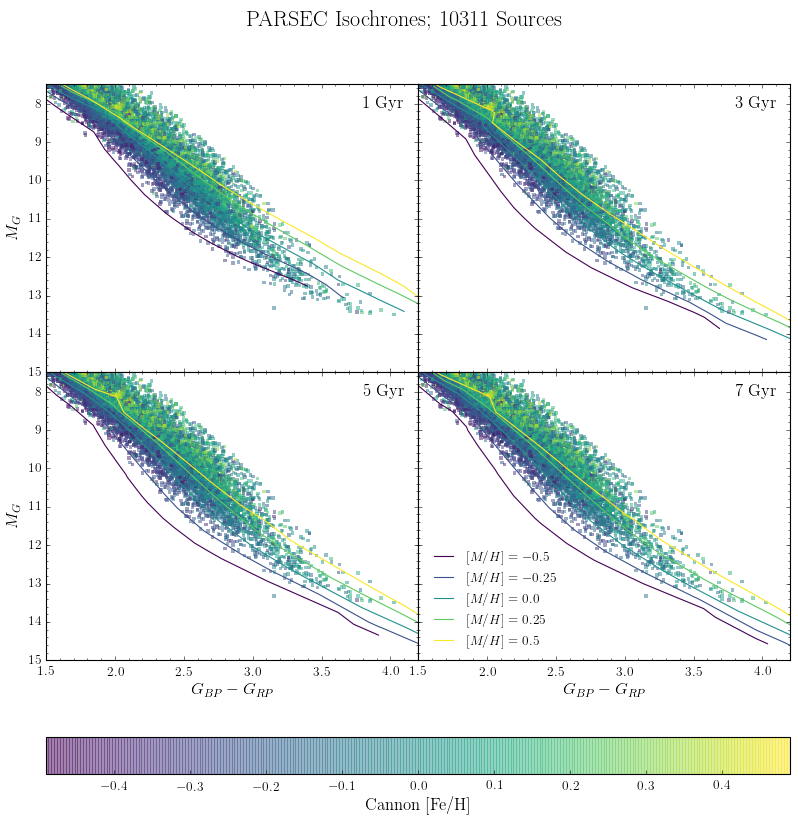

In [271]:
ages = ['1Gyr', '3Gyr', '5Gyr', '7Gyr']
rng = [0,30]
met = np.linspace(-.5,.5,5)


fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=[12,12], sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

for j, ax in enumerate(fig.axes):
    age = ages[j]
    pars_dir = 'isochrones/parsec/evans_passbands/%s/'%(age)
    flist = [r'%sMH_%s.dat'%(m, age) for m in met]
    pars = [ascii.read(pars_dir + file) for file in flist]

    colors = [cm.viridis(x) for x in np.linspace(0,1,len(pars))]

    ax.scatter(test['BP_RP'], test['G_ABS'], c=test['FE_H'], cmap='viridis', edgecolor='none', s=10, marker='s', \
                 label=None, alpha=.5)
    
    ax.text(3.8, 8.1, ages[j][0]+' Gyr', fontsize=15)

    for i in range(len(pars)):
        ax.plot(pars[i]['G_BPmag'][rng[0]:rng[1]] - pars[i]['G_RPmag'][rng[0]:rng[1]], pars[i]['Gmag'][rng[0]:rng[1]], \
                color=colors[i], label=r'$[M/H]=%s$'%(met[i]))
    
ax3.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax4.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_ylabel(r'$M_{G}$', fontsize=15)
ax3.set_ylabel(r'$M_{G}$', fontsize=15)

cb = fig.colorbar(pl, ax=((ax1,ax2), (ax3,ax4)), orientation='horizontal', pad=.1)
cb.set_label(r'Cannon [Fe/H]', fontsize=15)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.suptitle(r'PARSEC Isochrones; %s Sources'%(len(test)), fontsize=20)
plt.legend(loc='lower left', scatterpoints=1, frameon=False, fontsize=12)
plt.minorticks_on()
plt.show()

In [112]:
mist = read_mist_models.ISOCMD('/home/jess/Desktop/Research/gaiadr2/mdwarf_plots/isochrones/mist/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd')

Reading in: /home/jess/Desktop/Research/gaiadr2/mdwarf_plots/isochrones/mist/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd


In [113]:
print('version: ', mist.version)
print('photometric system: ', mist.photo_sys)
print('abundances: ', mist.abun)
print('rotation: ', mist.rot)
print('ages: ', [round(x,2) for x in mist.ages])
print('number of ages: ', mist.num_ages)
print('available columns: ', mist.hdr_list)
print('Av extinction: ', mist.Av_extinction)

version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  UBV(RI)c, 2MASS, Kepler, Hipparcos, Gaia (Vega)
abundances:  {'Yinit': 0.2511, 'Zinit': 0.00142857, '[Fe/H]': -1.0, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Be

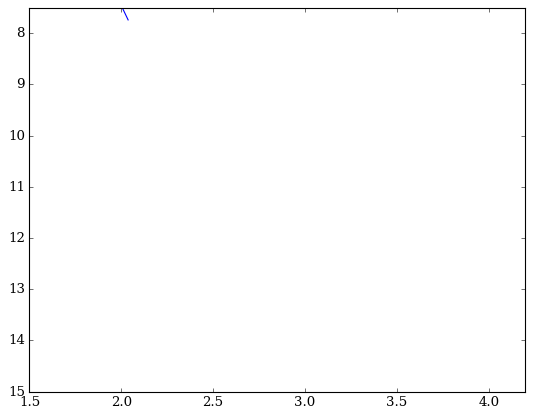

In [114]:
age_ind = mist.age_index(5.6) #returns the index for the desired age
g = mist.isocmds[age_ind]['Gaia_G_DR2Rev']
bp = mist.isocmds[age_ind]['Gaia_BP_DR2Rev']
rp = mist.isocmds[age_ind]['Gaia_RP_DR2Rev']
plt.plot(bp-rp, g)
plt.ylim(15,7.5)
plt.xlim(1.5,4.2)
plt.show()